In [1]:
import pandas

In [2]:
train_df = pandas.read_csv("train.csv")

In [3]:
import sweetviz

                                             |                                             | [  0%]   00:00 ->…


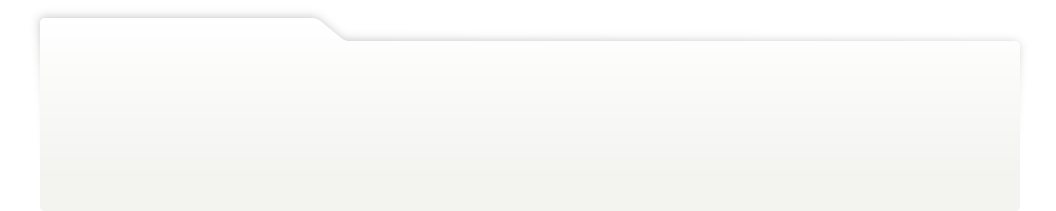
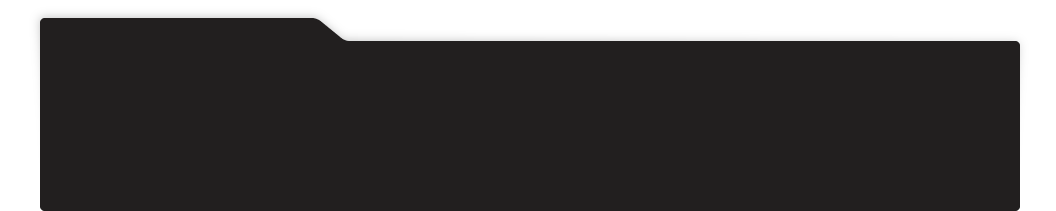
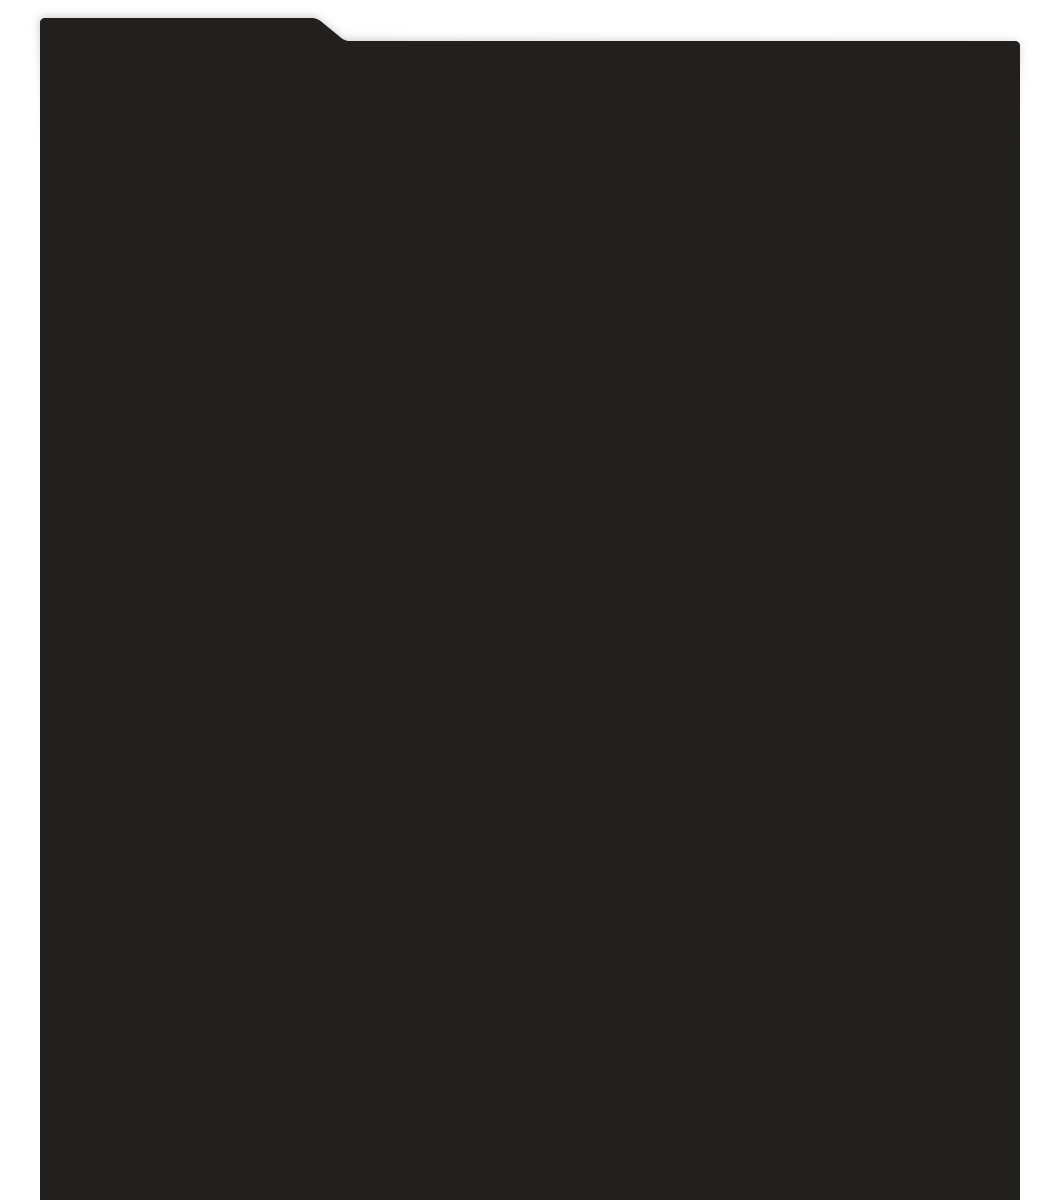
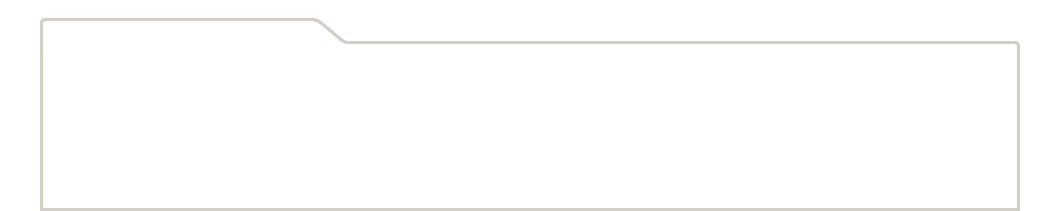
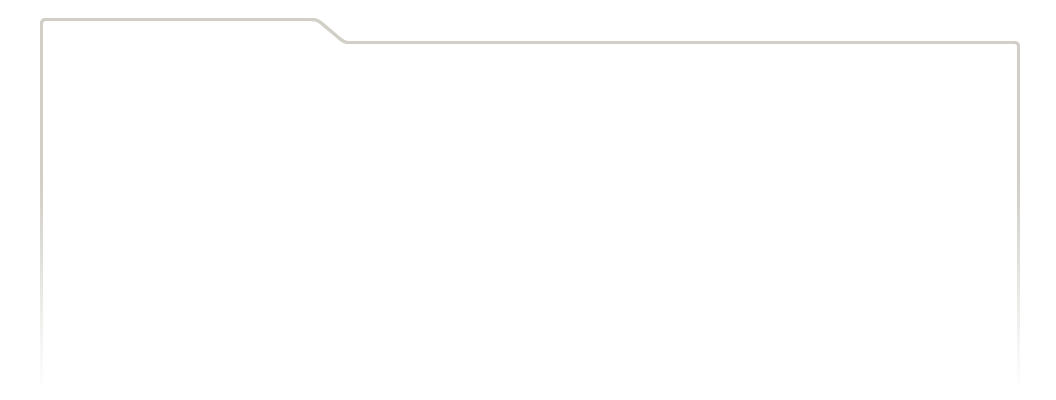
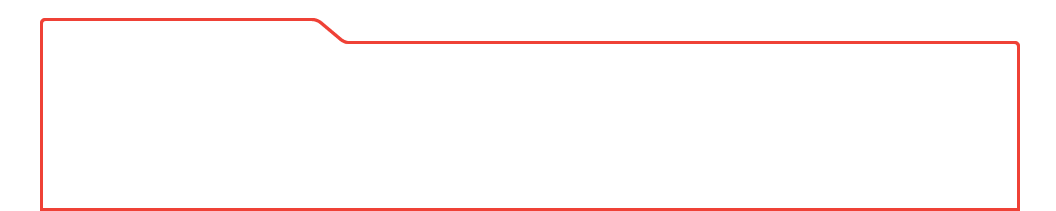
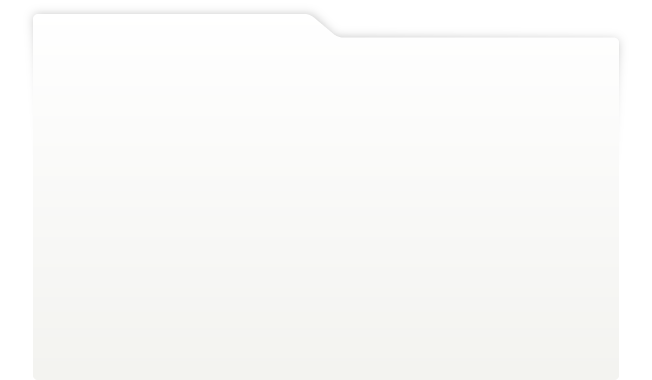
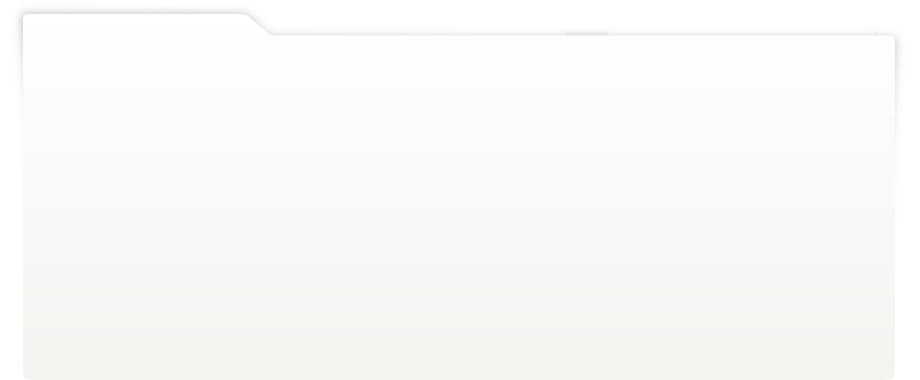
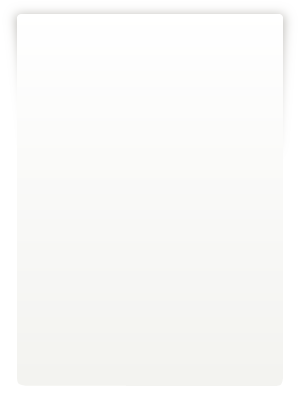
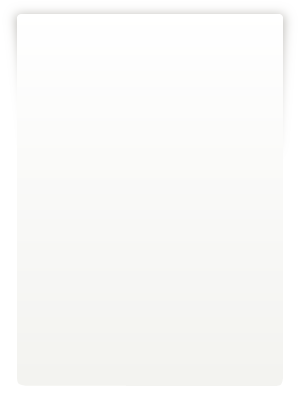
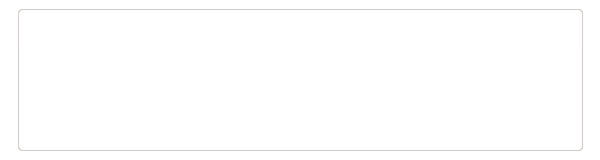
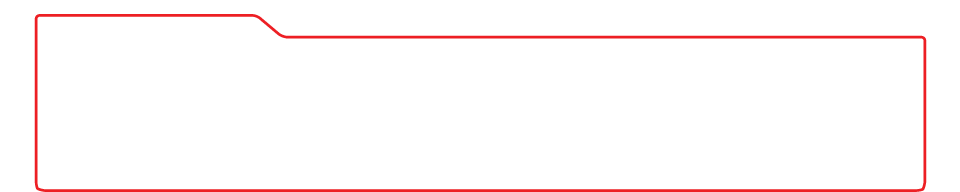
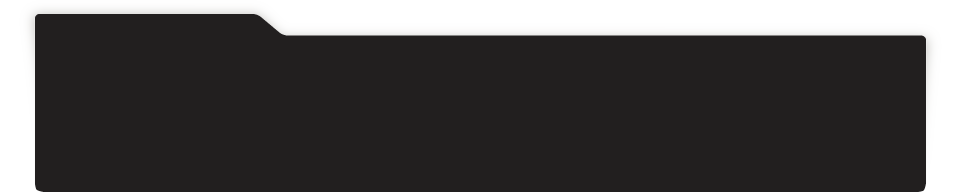
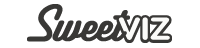
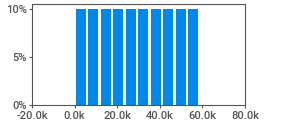
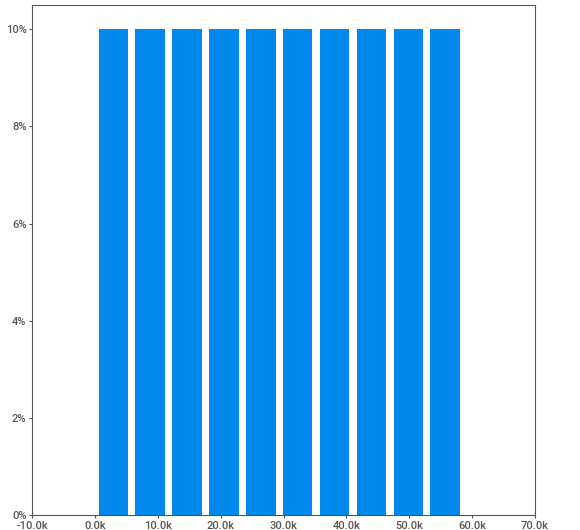
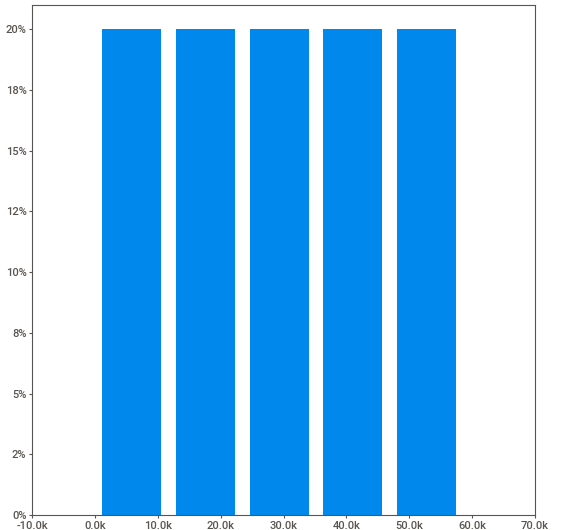
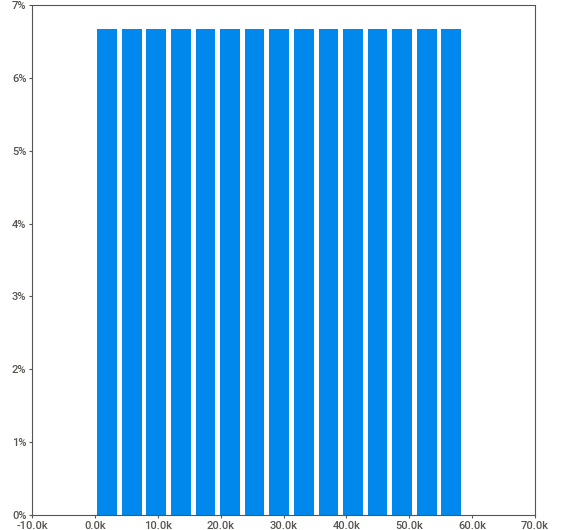
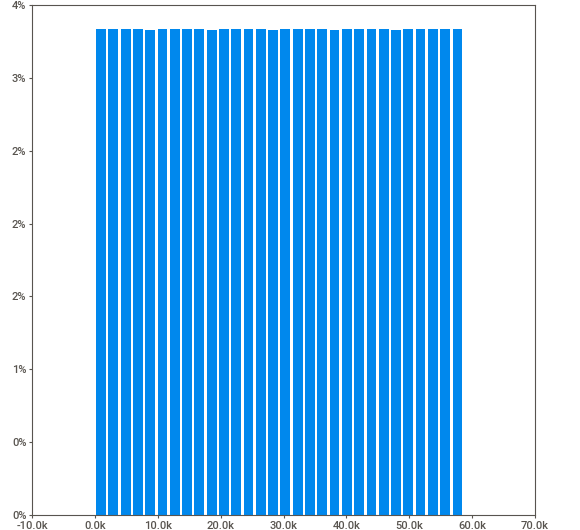
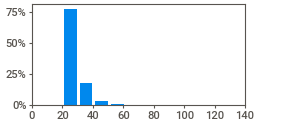
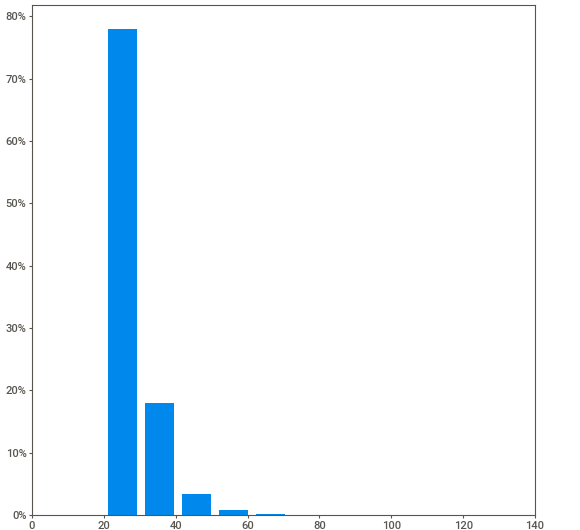
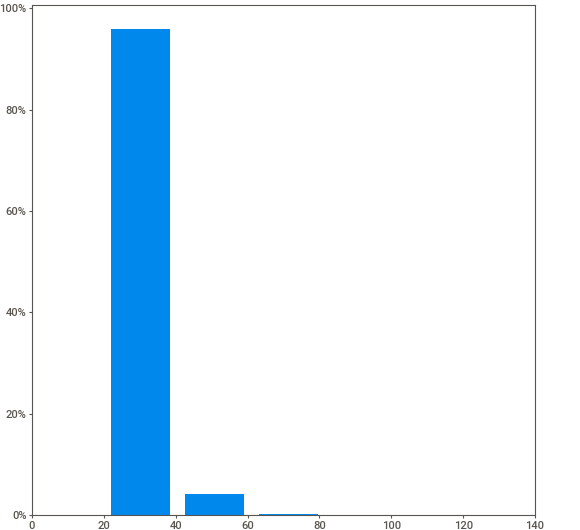
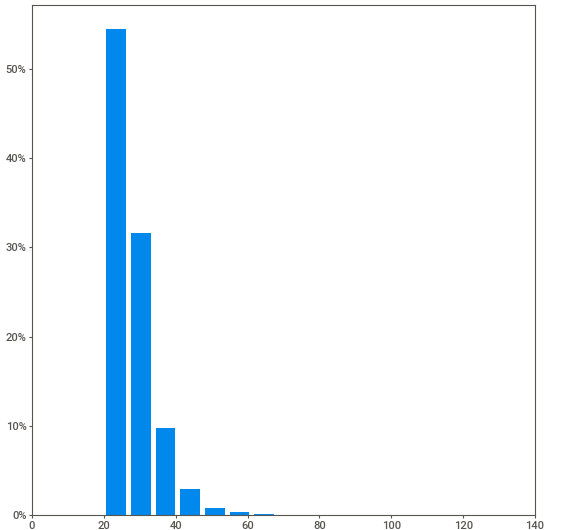
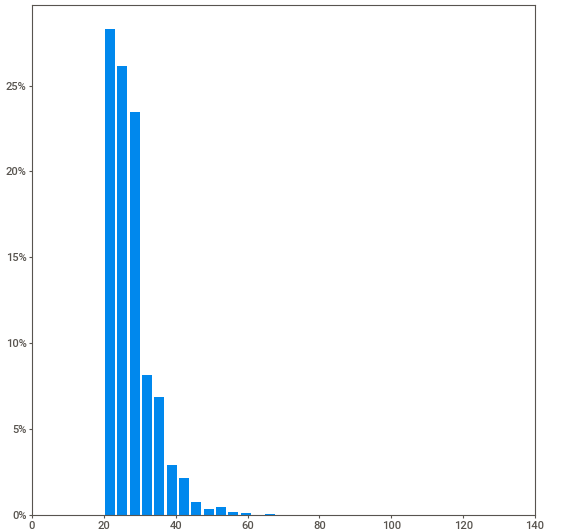
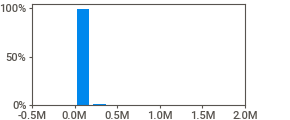
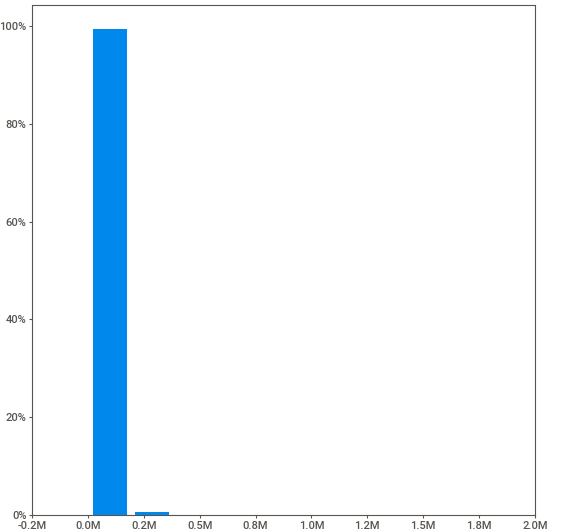
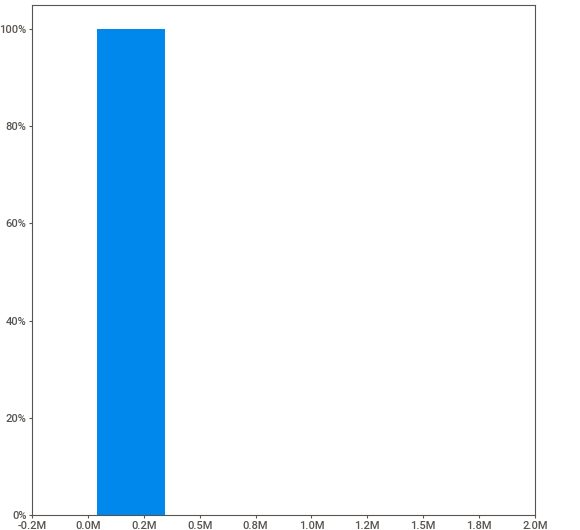
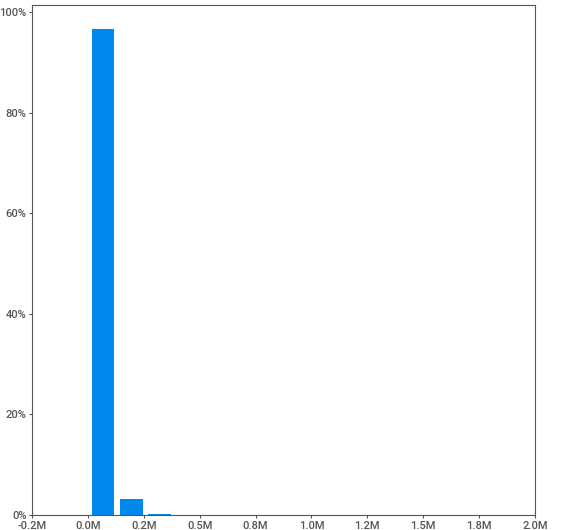
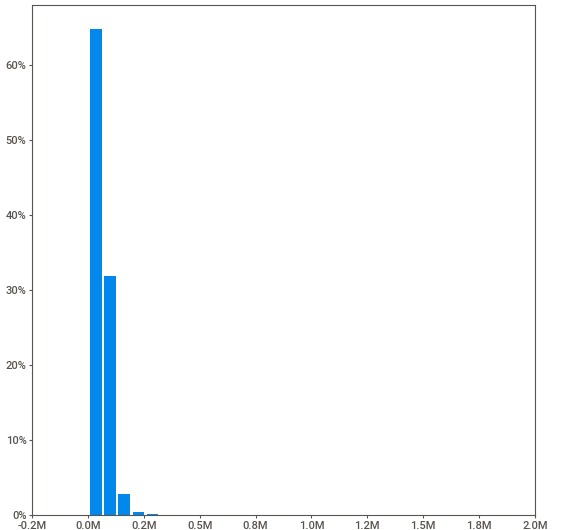
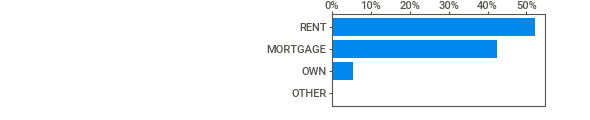
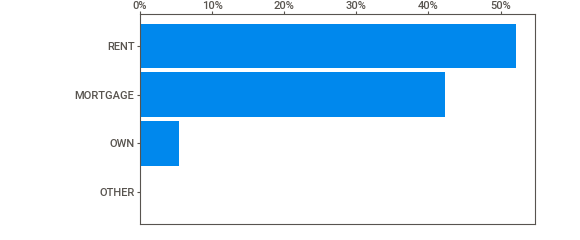
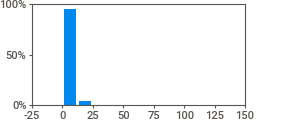
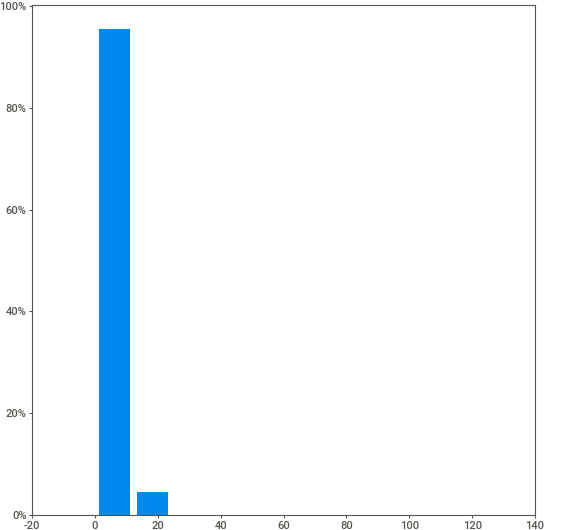
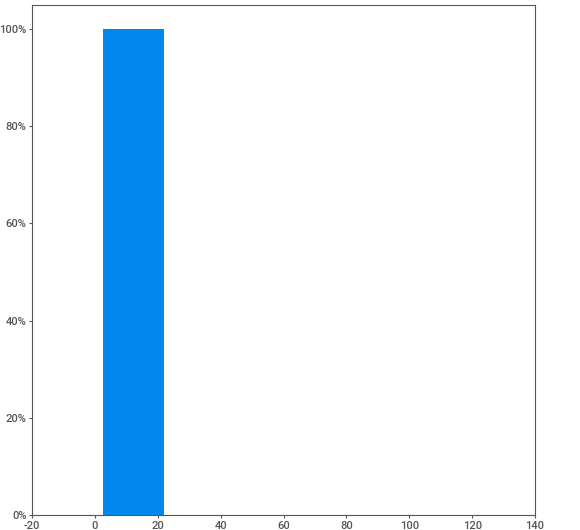
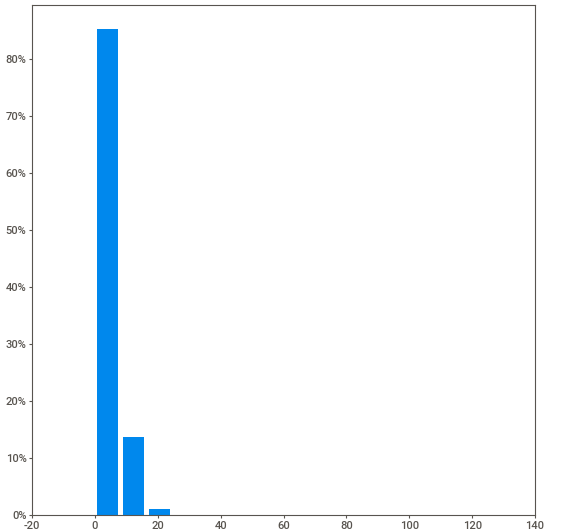
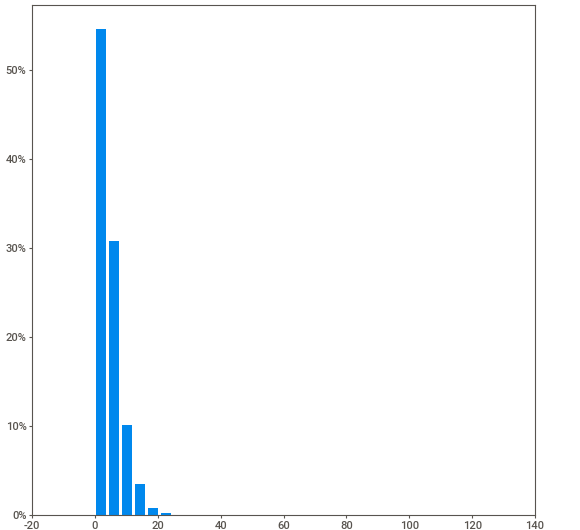
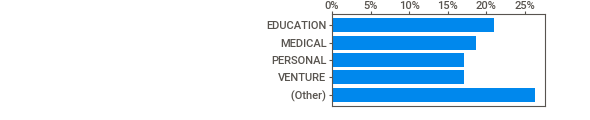
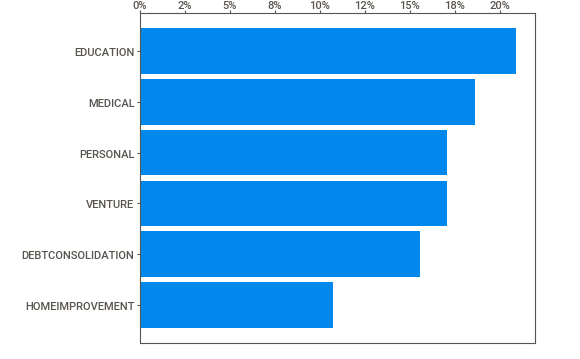
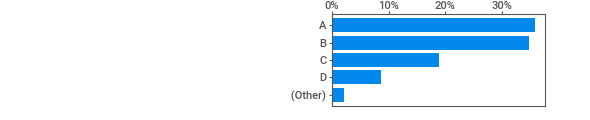
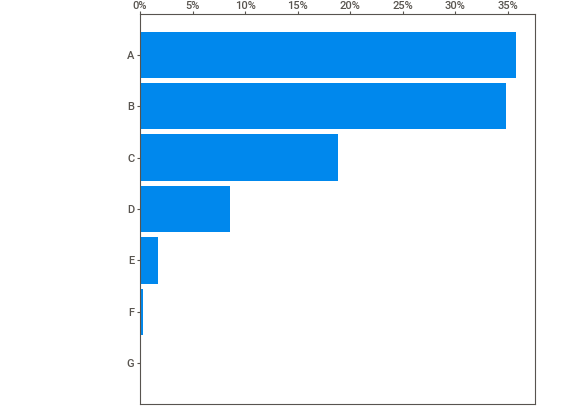
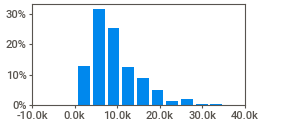
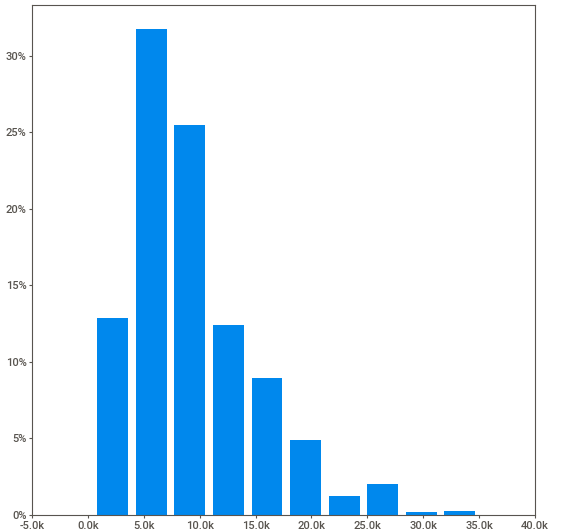
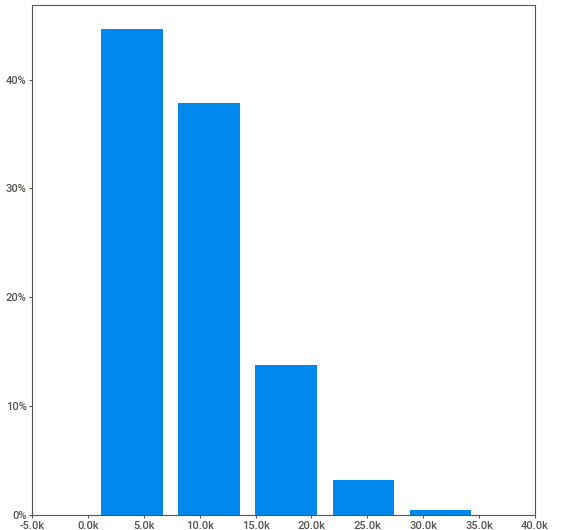
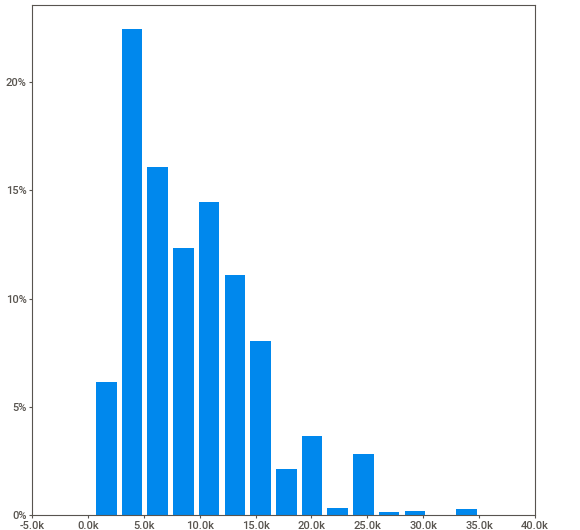
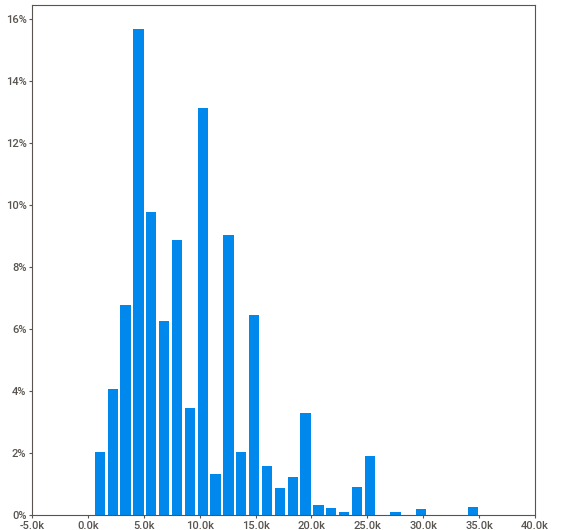
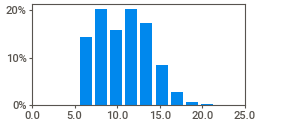
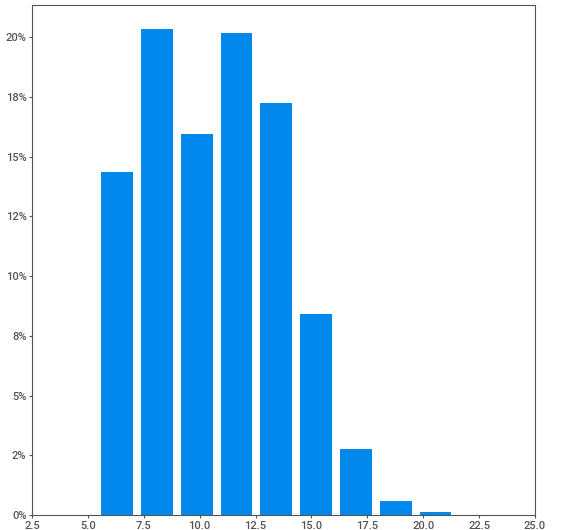
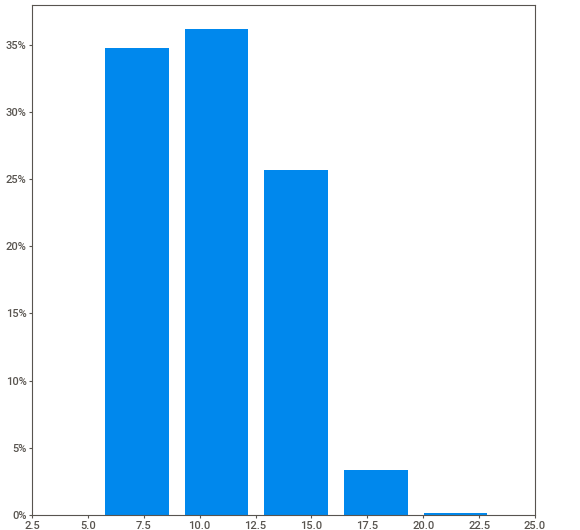
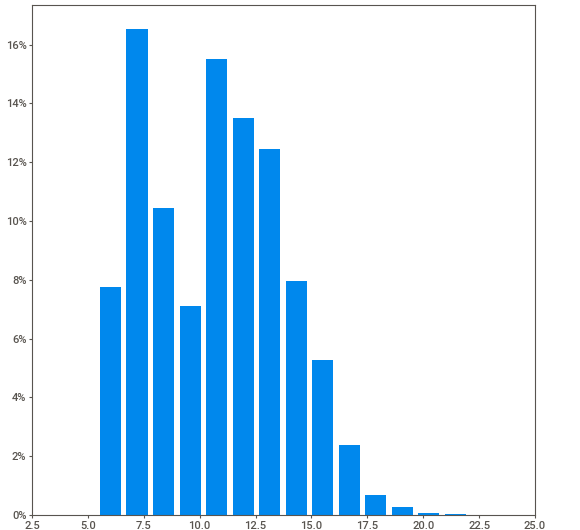
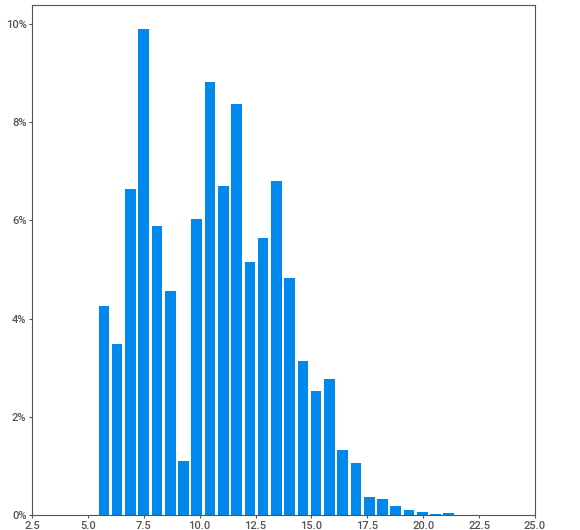
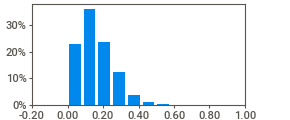
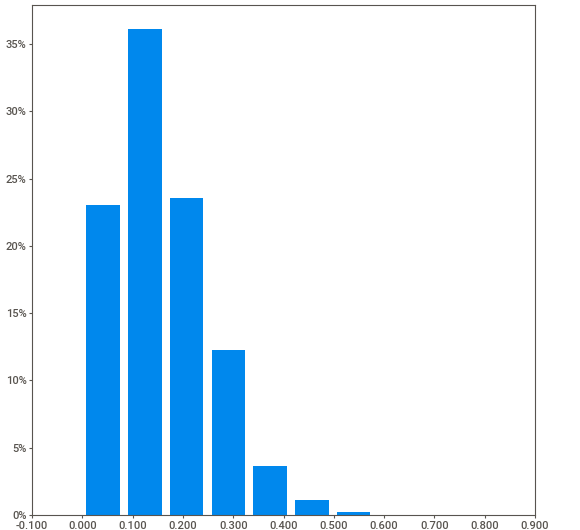
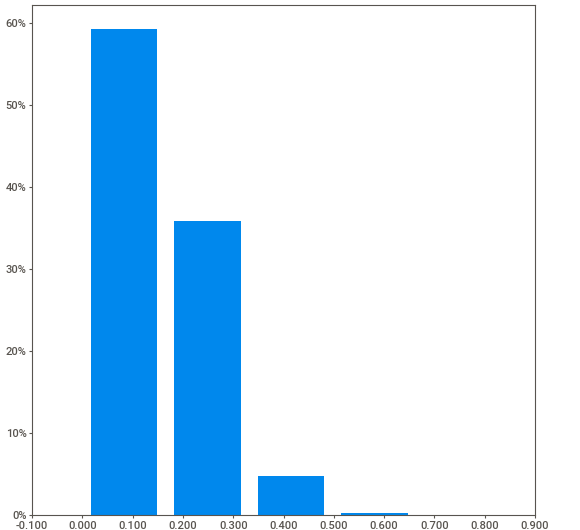
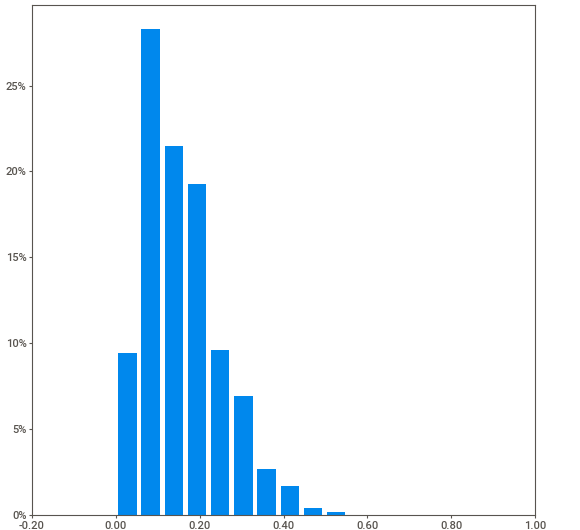
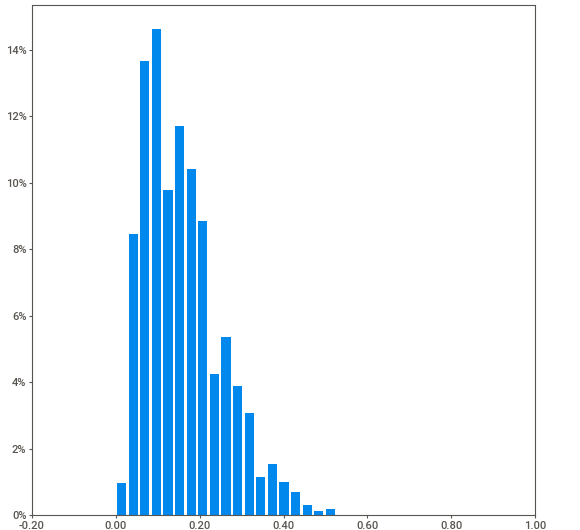
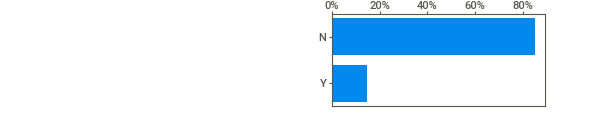
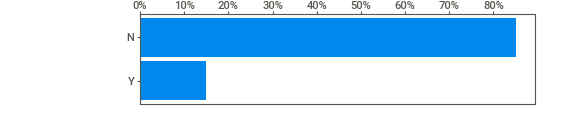
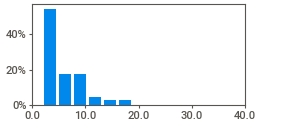
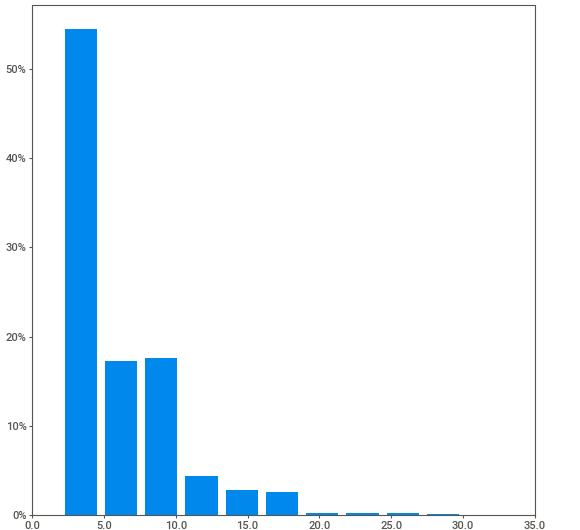
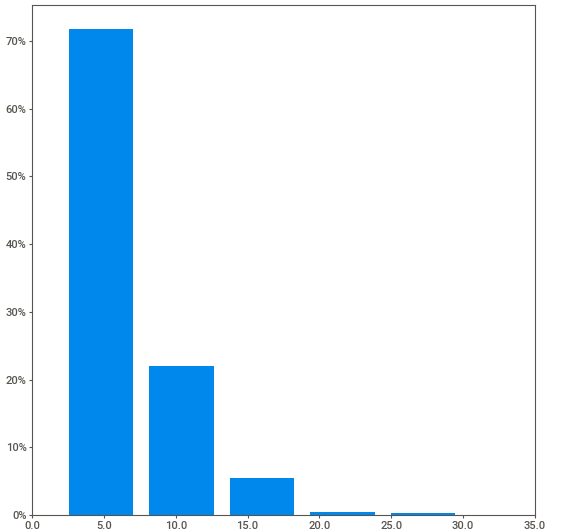
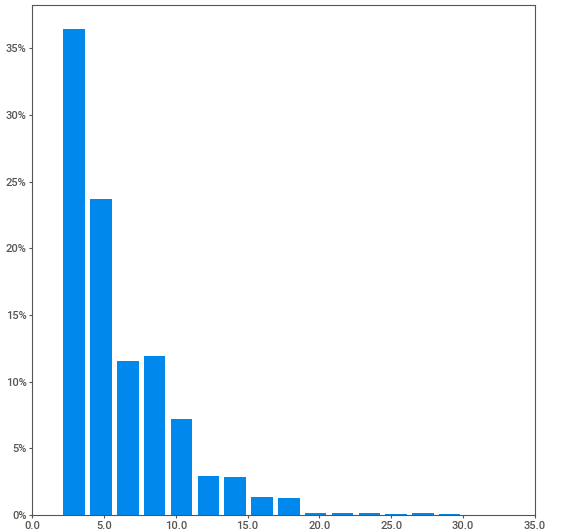
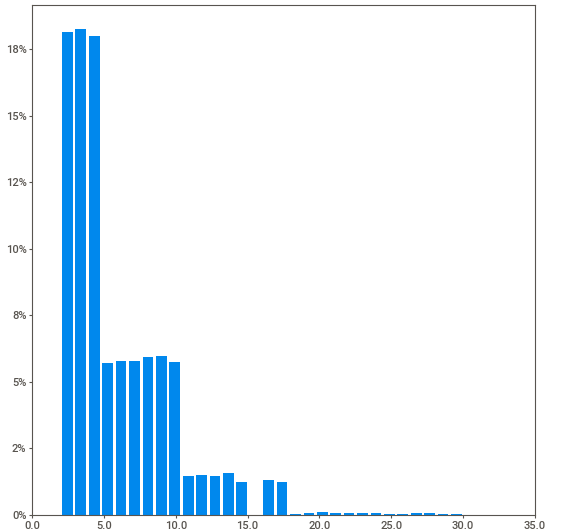
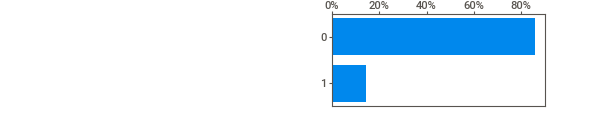
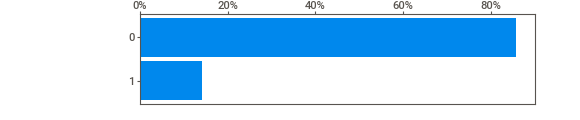
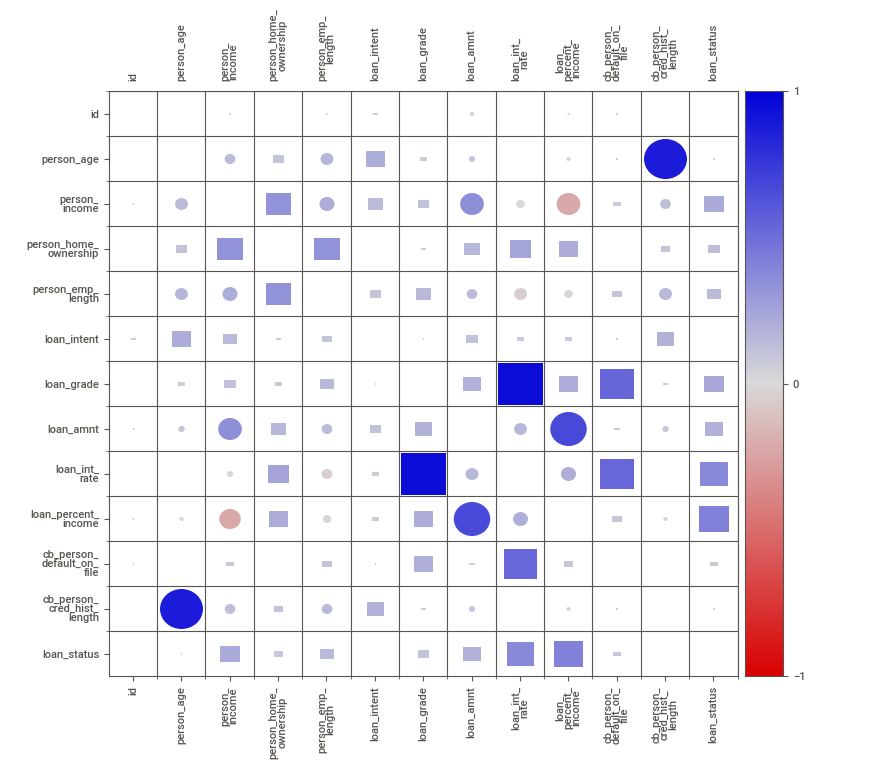
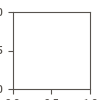

In [5]:
report = sweetviz.analyze(train_df)
report.show_notebook()

In [6]:
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [19]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [15]:
import feature_engine.encoding
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import sklearn.preprocessing

In [23]:
pipeline = feature_engine.pipeline.make_pipeline(
    feature_engine.selection.DropFeatures(features_to_drop=["id"]),
    feature_engine.encoding.OrdinalEncoder(encoding_method="arbitrary", variables=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]),
    #feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.StandardScaler(), variables=["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]),
)

In [24]:
train_processed_df = pipeline.fit_transform(train_df)
train_processed_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,0,0.0,0,0,6000,11.49,0.17,0,14,0
1,22,56000,1,6.0,1,1,4000,13.35,0.07,0,2,0
2,29,28800,1,8.0,2,2,6000,8.90,0.21,0,10,0
3,30,70000,0,14.0,3,0,12000,11.11,0.17,0,5,0
4,22,60000,0,2.0,1,2,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,2,5.0,0,3,25000,15.95,0.21,1,10,0
58641,28,28800,0,0.0,1,1,10000,12.73,0.35,0,8,1
58642,23,44000,0,7.0,0,3,6800,16.00,0.15,0,2,1
58643,22,30000,0,2.0,0,2,5000,8.90,0.17,0,3,0


In [8]:
import pycaret.classification as classification

In [25]:
classification.setup(train_processed_df, target="loan_status")

,Description,Value
0,Session id,167
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(58645, 12)"
4,Transformed data shape,"(58645, 12)"
5,Transformed train set shape,"(41051, 12)"
6,Transformed test set shape,"(17594, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [26]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9515,0.9551,0.7186,0.9241,0.8084,0.7812,0.7893,0.1300
rf,Random Forest Classifier,0.9499,0.9324,0.7051,0.9254,0.8003,0.7723,0.7816,0.4780
gbc,Gradient Boosting Classifier,0.9477,0.9395,0.6991,0.9132,0.7919,0.7626,0.7715,0.4470
et,Extra Trees Classifier,0.9465,0.9205,0.6967,0.9060,0.7875,0.7575,0.7662,0.3570
ada,Ada Boost Classifier,0.9264,0.9204,0.6250,0.8149,0.7072,0.6659,0.6738,0.1650
dt,Decision Tree Classifier,0.9120,0.8293,0.7136,0.6830,0.6980,0.6465,0.6467,0.0340
lr,Logistic Regression,0.8950,0.8657,0.3968,0.7468,0.5176,0.4650,0.4946,1.0720
lda,Linear Discriminant Analysis,0.8948,0.8799,0.5085,0.6732,0.5792,0.5204,0.5272,0.0190
knn,K Neighbors Classifier,0.8914,0.8394,0.4879,0.6611,0.5613,0.5010,0.5086,0.3320
ridge,Ridge Classifier,0.8877,0.8800,0.3131,0.7538,0.4421,0.3914,0.4385,0.0170


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=167, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [27]:
model = classification.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9520,0.9587,0.7128,0.9350,0.8089,0.7821,0.7915
1,0.9537,0.9583,0.7380,0.9209,0.8194,0.7932,0.7996
2,0.9557,0.9604,0.7414,0.9332,0.8263,0.8013,0.8083
3,0.9552,0.9493,0.7329,0.9386,0.8231,0.7979,0.8059
4,0.9520,0.9581,0.7192,0.9272,0.8100,0.7831,0.7913
5,0.9530,0.9517,0.7243,0.9297,0.8142,0.7878,0.7958
6,0.9469,0.9574,0.6991,0.9069,0.7896,0.7598,0.7682
7,0.9508,0.9545,0.7145,0.9227,0.8054,0.7778,0.7861
8,0.9486,0.9502,0.7094,0.9101,0.7973,0.7684,0.7762


In [28]:
tuned_model = classification.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9554,0.9608,0.7402,0.9332,0.8255,0.8004,0.8075
1,0.9554,0.9575,0.7483,0.9239,0.8269,0.8016,0.8075
2,0.9547,0.9623,0.7414,0.9252,0.8232,0.7976,0.8040
3,0.9530,0.9531,0.7277,0.9259,0.8150,0.7885,0.7960
4,0.9503,0.9595,0.7243,0.9077,0.8057,0.7776,0.7841
5,0.9542,0.9538,0.7363,0.9267,0.8206,0.7948,0.8017
6,0.9471,0.9582,0.7060,0.9017,0.7919,0.7622,0.7697
7,0.9510,0.9584,0.7231,0.9156,0.8080,0.7804,0.7875
8,0.9459,0.9501,0.7162,0.8821,0.7906,0.7599,0.7653


Fitting 10 folds for each of 10 candidates, totalling 100 fits


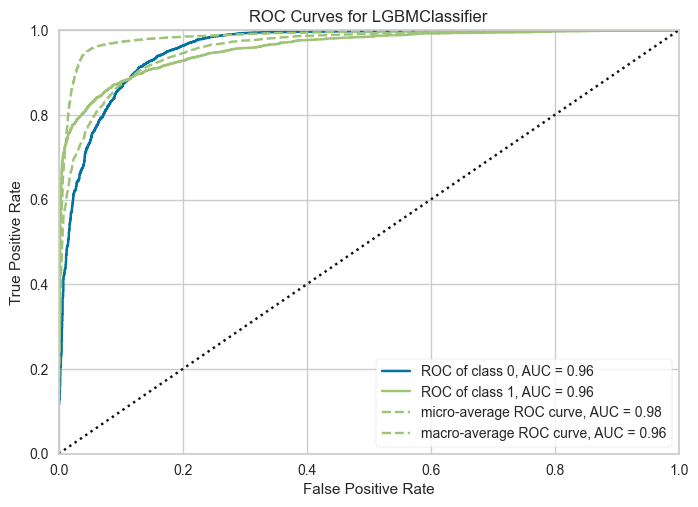

In [29]:
classification.plot_model(tuned_model)

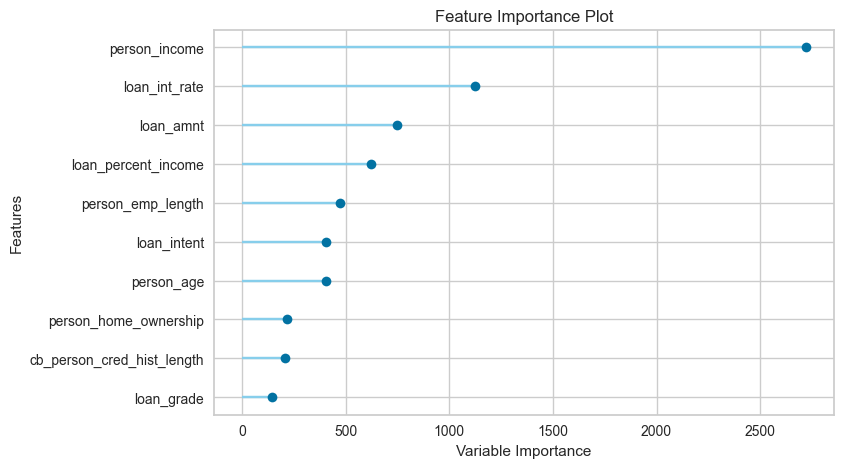

In [30]:
classification.plot_model(tuned_model, plot="feature")

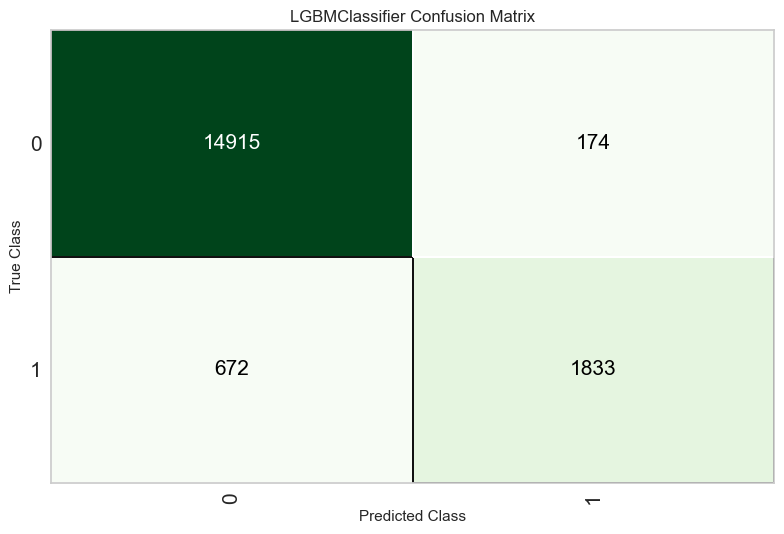

In [31]:
classification.plot_model(tuned_model, plot="confusion_matrix")

In [32]:
final_model = classification.finalize_model(tuned_model)

In [33]:
test_df = pandas.read_csv("test.csv")

In [36]:
tmp_df = test_df.copy()
tmp_df["loan_status"] = 0
test_processed_df = pipeline.transform(tmp_df)

In [38]:
predict_df = classification.predict_model(final_model, test_processed_df)
predict_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8899,0,0.0000,0.0000,0.0000,0.0000,0.0000


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,prediction_label,prediction_score
0,23,69000,0,3.0,5,5,25000,15.760000,0.36,0,2,0,1,0.9715
1,26,96000,2,6.0,2,1,10000,12.680000,0.10,1,4,0,0,0.9885
2,26,30000,0,5.0,3,4,4000,17.190001,0.13,1,2,0,1,0.6224
3,33,50000,0,4.0,4,2,7000,8.900000,0.14,0,7,0,0,0.9906
4,26,102000,2,8.0,5,3,15000,16.320000,0.15,1,4,0,0,0.9027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2,2.0,4,0,3000,10.370000,0.10,0,4,0,0,0.9797
39094,22,48000,2,6.0,0,2,7000,6.030000,0.15,0,3,0,0,0.9954
39095,51,60000,2,0.0,2,2,15000,7.510000,0.25,0,25,0,0,0.9905
39096,22,36000,2,4.0,2,3,14000,15.620000,0.39,1,4,0,0,0.5905


In [41]:
submit_df = test_df[["id"]]
submit_df = submit_df.join(predict_df[["prediction_label"]])
submit_df.columns = ["id", "loan_status"]
submit_df

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [42]:
submit_df.to_csv("submit.csv", index=False)